### **DATA ANALYSIS PYTHON PROJECT - TELCO CUSTOMER CHURN**

#### **Import Libraries**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Import Raw Data**

In [56]:
df = pd.read_csv("C:/Users/Windy/data-analyst/Telco-Customer-Churn.csv")

#### **Sample Data**

In [57]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,2800.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [58]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67.0,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19.0,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [59]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7040.000000,7043.000000
mean,0.162147,35.043892,64.761692
std,0.368612,115.282871,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,7100.000000,118.750000


#### **Size Data**

In [60]:
print("Size of Data ", df.shape)

Size of Data  (7043, 21)


#### **Field Info**

In [61]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### **Data Types**

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### **Data Cleaning**

##### Cheking Null Values

In [63]:
df.isna().sum()

customerID          0
gender              5
SeniorCitizen       0
Partner             0
Dependents          0
tenure              3
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Cheking Unique Values

In [64]:
unique_values_summary = {
    'Attribute': [],
    'Total Unique Values': [],
    'Unique Values': []
}
pd.set_option('display.max_colwidth', None)

for column in df.columns:
    unique_vals = df[column].unique()
    unique_values_summary['Attribute'].append(column)
    unique_values_summary['Unique Values'].append(unique_vals)
    unique_values_summary['Total Unique Values'].append(len(unique_vals))

display(pd.DataFrame(unique_values_summary))

pd.reset_option('display.max_colwidth')

,Attribute,Total Unique Values,Unique Values
0,customerID,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-HQITU, 9305-CDSKC, 1452-KIOVK, 6713-OKOMC, 7892-POOKP, 6388-TABGU, 9763-GRSKD, 7469-LKBCI, 8091-TTVAX, 0280-XJGEX, 5129-JLPIS, 3655-SNQYZ, 8191-XWSZG, 9959-WOFKT, 4190-MFLUW, 4183-MYFRB, 8779-QRDMV, 1680-VDCWW, 1066-JKSGK, 3638-WEABW, 6322-HRPFA, 6865-JZNKO, 6467-CHFZW, 8665-UTDHZ, 5248-YGIJN, 8773-HHUOZ, 3841-NFECX, 4929-XIHVW, 6827-IEAUQ, 7310-EGVHZ, 3413-BMNZE, 6234-RAAPL, 6047-YHPVI, 6572-ADKRS, 5380-WJKOV, 8168-UQWWF, 8865-TNMNX, 9489-DEDVP, 9867-JCZSP, 4671-VJLCL, 4080-IIARD, 3714-NTNFO, 5948-UJZLF, 7760-OYPDY, 7639-LIAYI, 2954-PIBKO, 8012-SOUDQ, 9420-LOJKX, 6575-SUVOI, 7495-OOKFY, 4667-QONEA, 1658-BYGOY, 8769-KKTPH, 5067-XJQFU, 3957-SQXML, 5954-BDFSG, 0434-CSFON, 1215-FIGMP, 0526-SXDJP, 0557-ASKVU, 5698-BQJOH, 5122-CYFXA, 8627-ZYGSZ, 3410-YOQBQ, 3170-NMYVV, 7410-OIEDU, 2273-QCKXA, 0731-EBJQB, 1891-QRQSA, 8028-PNXHQ, 5630-AHZIL, 2673-CXQEU, 6416-JNVRK, 5590-ZSKRV, 0191-ZHSKZ, 3887-PBQAO, 5919-TMRGD, 8108-UXRQN, 9191-MYQKX, 9919-YLNNG, 0318-ZOPWS, 4445-ZJNMU, 4808-YNLEU, 1862-QRWPE, 2796-NNUFI, 3016-KSVCP, 4767-HZZHQ, 2424-WVHPL, 7233-PAHHL, 6067-NGCEU, 9848-JQJTX, 8637-XJIVR, 9803-FTJCG, 0278-YXOOG, 3212-KXOCR, 4598-XLKNJ, ...]"
1,gender,5,"[F, Male, Female, M, nan]"
2,SeniorCitizen,2,"[0, 1]"
3,Partner,2,"[Yes, No]"
4,Dependents,2,"[No, Yes]"
5,tenure,79,"[1.0, 34.0, 2.0, 45.0, 8.0, 22.0, 10.0, 2800.0, 62.0, 13.0, 16.0, 58.0, 49.0, 25.0, 69.0, 52.0, 71.0, 21.0, 12.0, 30.0, 47.0, 72.0, 17.0, 27.0, 5.0, 46.0, 11.0, 70.0, 63.0, 43.0, 15.0, 60.0, 18.0, 66.0, 9.0, 3.0, 31.0, 50.0, 64.0, 56.0, 7.0, 42.0, 35.0, 4800.0, 29.0, 65.0, 38.0, 68.0, 32.0, 55.0, 37.0, 36.0, 41.0, 6.0, 4.0, 33.0, 67.0, 23.0, 57.0, 61.0, 14.0, 2000.0, 53.0, 20.0, 40.0, 59.0, 24.0, 44.0, 19.0, 7100.0, 54.0, 51.0, 2300.0, 48.0, 28.0, nan, 26.0, 0.0, 39.0]"
6,PhoneService,2,"[No, Yes]"
7,MultipleLines,3,"[No phone service, No, Yes]"
8,InternetService,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,3,"[No, Yes, No internet service]"


#### **Gender**

##### Cheking Unique Gender

In [65]:
df['gender'].value_counts()

gender
Male      3550
Female    3483
M            3
F            2
Name: count, dtype: int64

##### Replace Gender

In [66]:
df['gender'] = df['gender'].replace({'F' : 'Female'
                                    ,'M' : 'Male'})

##### Handling missing value with mode

In [67]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [68]:
print(df['gender'].value_counts())

gender
Male      3558
Female    3485
Name: count, dtype: int64


#### **tenure**

#### handling missing value

In [69]:
cek_data = df[df['tenure'].isnull()]
display(cek_data[['tenure', 'MonthlyCharges', 'TotalCharges']])

,tenure,MonthlyCharges,TotalCharges
366,NaN,59.95,1406
433,NaN,45.40,518.9
513,NaN,105.45,5916.95


#### ubah tipe data TotalCharges menjadi float agar bisa mengoperasikan hasil tenure

In [70]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Tipe data sekarang:", df['TotalCharges'].dtype)

Tipe data sekarang: float64


In [71]:
df['tenure'] = df['tenure'].fillna(df['TotalCharges'] / df['MonthlyCharges'])
df['tenure'] = np.ceil(df['tenure'])

In [72]:
display(df.loc[[366, 433, 513], ['tenure', 'MonthlyCharges', 'TotalCharges']])

,tenure,MonthlyCharges,TotalCharges
366,24.0,59.95,1406.00
433,12.0,45.40,518.90
513,57.0,105.45,5916.95


In [73]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [74]:
cek = df[df['TotalCharges'].isnull()]
display(cek[['tenure', 'MonthlyCharges', 'TotalCharges']])

,tenure,MonthlyCharges,TotalCharges
488,0.0,52.55,NaN
753,0.0,20.25,NaN
936,0.0,80.85,NaN
1082,0.0,25.75,NaN
1340,0.0,56.05,NaN
3331,0.0,19.85,NaN
3826,0.0,25.35,NaN
4380,0.0,20.00,NaN
5218,0.0,19.70,NaN
6670,0.0,73.35,NaN


#### isilah nan dengan 0

In [75]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print("Jumlah NaN TotalCharges sekarang:", df['TotalCharges'].isnull().sum())

Jumlah NaN TotalCharges sekarang: 0


#### **tenure**

#### cek outlier pada tenure

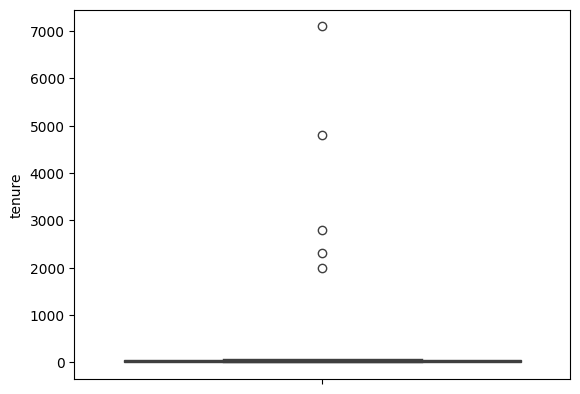

In [76]:
sns.boxplot(y=df['tenure'])

plt.show()

In [77]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(df[cols].nlargest(10, 'tenure'))

     tenure  MonthlyCharges  TotalCharges
221  7100.0           24.75       1836.90
87   4800.0           20.65       1057.00
8    2800.0          104.80       3046.05
300  2300.0           64.90       1509.80
161  2000.0           82.40       1592.35
28     72.0           90.25       6369.45
35     72.0           99.90       7251.70
59     72.0          107.50       7853.70
62     72.0           42.10       2962.00
94     72.0          100.90       7459.05


#### atasi outlier tenure>100

In [ ]:
mask_error = df['tenure'] > 100

df.loc[mask_error, 'tenure'] = df.loc[mask_error, 'TotalCharges'] / df.loc[mask_error, 'MonthlyCharges']

df['tenure'] = df['tenure'].round().astype(int)

print("Data setelah diperbaiki:")
print(df.loc[[221, 87, 8, 300]])

Data setelah diperbaiki:
     customerID  gender  SeniorCitizen Partner Dependents  tenure  \
221  4443-EMBNA  Female              0     Yes         No      74   
87   1862-QRWPE  Female              0     Yes        Yes      51   
8    7892-POOKP  Female              0     Yes         No      29   
300  0895-LMRSF    Male              0      No         No      23   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
221          Yes           Yes              No  No internet service  ...   
87           Yes            No              No  No internet service  ...   
8            Yes           Yes     Fiber optic                   No  ...   
300          Yes            No             DSL                   No  ...   

        DeviceProtection          TechSupport          StreamingTV  \
221  No internet service  No internet service  No internet service   
87   No internet service  No internet service  No internet service   
8                    Yes              

In [79]:
print(df['tenure'].describe())

count    7043.000000
mean       32.372285
std        24.560614
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        74.000000
Name: tenure, dtype: float64
